# Temperature Sensitivity Analysis

The load modeling tool produces a piece-wise linear load model of power as function of temperature.  The load model tool reads a CSV file containing timestamped samples of power and temperature data.  The data is separated into three groups, heating, cooling, and neither.  This latter category is called the base load, and corresponds to loads for temperature conditions between the heating and cooling balance temperatures, as shown in Figure 1.

![example.png](example.png "Example")
Figure 1: Example load model

In [1]:
import pandas as pd
import load_model as lm
data = lm.load_data(ifile='testdata.csv',datetime_col=0,power_col=1,temperature_col=2)
print(data[0:10])

                       power  temperature
datetime                                 
2014-10-01 00:00:00  1798.85        52.35
2014-10-01 00:05:00  1782.63        52.26
2014-10-01 00:10:00  1766.58        52.14
2014-10-01 00:15:00  1768.91        51.95
2014-10-01 00:20:00  1756.20        51.99
2014-10-01 00:25:00  1744.86        51.98
2014-10-01 00:30:00  1734.70        51.86
2014-10-01 00:35:00  1750.62        51.96
2014-10-01 00:40:00  1730.56        52.05
2014-10-01 00:45:00  1724.83        51.86


In [2]:
model = lm.get_model(data,datetime_col=0,power_col=1,temperature_col=2)
pd.options.display.float_format = '{:,.1f}'.format
print(model)

       Pbase   Pheat   Pcool  Tmin  Theat  Tcool  Tmax  Sbase  Sheat  Scool
Hour                                                                       
0    1,779.5 2,667.5 2,560.3  22.9   51.2   61.2  79.8    1.6  -31.4   41.9
1    1,704.0 2,616.7 2,246.5  22.6   50.7   60.7  75.5    2.3  -32.4   36.9
2    1,664.1 2,610.3 2,168.5  22.2   50.7   60.7  76.5    2.8  -33.2   31.8
3    1,657.0 2,669.1 2,106.7  21.4   50.8   60.8  76.2    2.5  -34.5   29.1
4    1,707.4 2,791.8 2,040.0  20.9   50.8   60.8  73.1    2.6  -36.2   27.1
5    1,860.0 3,009.3 2,063.1  20.8   51.3   61.3  71.3    2.5  -37.7   20.4
6    2,101.4 3,350.6 2,281.9  21.2   53.0   63.0  73.6    1.2  -39.3   17.0
7    2,275.2 3,561.2 2,557.6  20.8   54.2   64.2  81.2    0.3  -38.5   16.6
8    2,344.9 3,571.4 2,869.2  20.6   53.8   63.8  83.8    0.7  -37.0   26.2
9    2,383.7 3,549.3 3,064.3  22.5   54.4   64.4  85.9    0.1  -36.5   31.7
10   2,412.6 3,461.4 3,262.9  25.4   55.2   65.2  88.2   -0.1  -35.1   36.9
11   2,419.4

# Example results

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Example 1

This example computes the load for a single hour/temperature point.

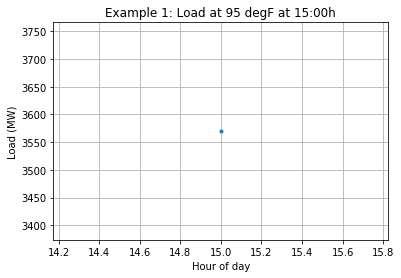

In [4]:
h = 15
t = 95.0
p = lm.get_load(model,h,t)

plt.plot(15,p,'.')
plt.xlabel("Hour of day")
plt.ylabel("Load (MW)")
plt.title("Example 1: Load at 95 degF at 15:00h")
plt.grid()
plt.show()

# Example 2

This example computes the load for each hour of the day at a given temperature.

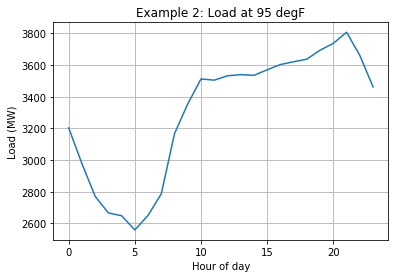

In [5]:
h = range(24)
t = 95.0
p = lm.get_load(model,h,t)

plt.plot(h,p)
plt.xlabel("Hour of day")
plt.ylabel("Load (MW)")
plt.title("Example 2: Load at 95 degF")
plt.grid()
plt.show()

# Example 3

This example computes the load profile for an hour of the day.

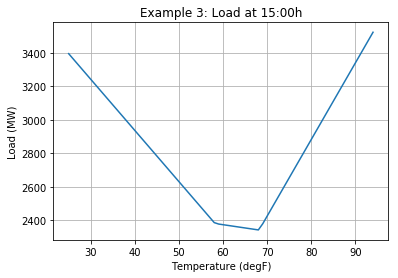

In [6]:
h = 15
t = np.arange(25,95)
p = lm.get_load(model,h,t)

plt.plot(t,p)
plt.xlabel("Temperature (degF)")
plt.ylabel("Load (MW)")
plt.title("Example 3: Load at 15:00h")
plt.grid()
plt.show()

# Example 4

This example computes the load shape for various temperature conditions.

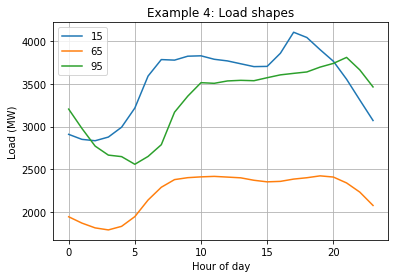

In [7]:
h = range(24)
t = [15,65,95]
p = lm.get_load(model,h,t)

plt.plot(p)
plt.xlabel("Hour of day")
plt.ylabel("Load (MW)")
plt.title("Example 4: Load shapes")
plt.grid()
plt.legend(t)
plt.show()

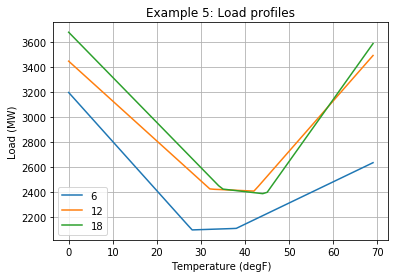

In [8]:
h = [6,12,18]
t = range(25,95)
p = np.array(lm.get_load(model,h,t)).transpose()

plt.plot(p)
plt.xlabel("Temperature (degF)")
plt.ylabel("Load (MW)")
plt.title("Example 5: Load profiles")
plt.legend(h)
plt.grid()
plt.show()

----
# Electrification

In [1]:
import load_model as lm
import numpy as np
import pandas as pd
pd.options.display.max_rows=7
electrification = lm.load_electrification()
electrification

,city,region,building_type,heat_pump,other_electric_heat,cooling,water_heating,cooking
location,,,,,,,,
YFC,Fredericton NB,Canada,residential,0.0,0.67,0.00,0.0,0.00
YHZ,Halifax NS,Canada,residential,0.0,0.33,0.00,0.0,0.00
YOW,Ottawa ON,Canada,residential,0.0,0.28,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...
RMN,Rocky Mountains,Mountain,commercial,0.1,0.13,0.84,0.4,0.31
DWS,Desert Southwest,Mountain,commercial,0.1,0.13,0.84,0.4,0.31
HID,High Desert,Mountain,commercial,0.1,0.13,0.84,0.4,0.31


In [2]:
electrification.loc["NYC"]

,city,region,building_type,heat_pump,other_electric_heat,cooling,water_heating,cooking
location,,,,,,,,
NYC,New York NY,Middle Atlantic,residential,0.03,0.11,0.88,0.31,0.43
NYC,New York NY,Middle Atlantic,commercial,0.09,0.06,0.89,0.41,0.31


In [3]:
electrification[["heat_pump","other_electric_heat","cooling","water_heating","cooking"]]

,heat_pump,other_electric_heat,cooling,water_heating,cooking
location,,,,,
YFC,0.0,0.67,0.00,0.0,0.00
YHZ,0.0,0.33,0.00,0.0,0.00
YOW,0.0,0.28,0.00,0.0,0.00
...,...,...,...,...,...
RMN,0.1,0.13,0.84,0.4,0.31
DWS,0.1,0.13,0.84,0.4,0.31
HID,0.1,0.13,0.84,0.4,0.31


In [4]:
electrification[["heat_pump"]][electrification["building_type"]=="residential"]

,heat_pump
location,
YFC,0.00
YHZ,0.00
YOW,0.00
...,...
RMN,0.08
DWS,0.08
HID,0.08


In [5]:
electrification[["building_type","cooling"]][electrification["region"]=="Pacific"]

,building_type,cooling
location,,
SFO,residential,0.66
SMF,residential,0.66
LAX,residential,0.66
...,...,...
SCC,commercial,0.88
SCI,commercial,0.88
SCV,commercial,0.88


In [6]:
lm.load_electrification(select={"region":"Pacific"})

,city,region,building_type,heat_pump,other_electric_heat,cooling,water_heating,cooking
location,,,,,,,,
SFO,San Francisco CA,Pacific,residential,0.07,0.25,0.66,0.32,0.53
SMF,Sacremento CA,Pacific,residential,0.07,0.25,0.66,0.32,0.53
LAX,Los Angeles CA,Pacific,residential,0.07,0.25,0.66,0.32,0.53
...,...,...,...,...,...,...,...,...
SCC,Southern California Coast,Pacific,commercial,0.15,0.21,0.88,0.51,0.22
SCI,Southern California Interior,Pacific,commercial,0.15,0.21,0.88,0.51,0.22
SCV,Southern California Valley,Pacific,commercial,0.15,0.21,0.88,0.51,0.22


# Example 1

This example retrieves the commercial building load electrification data table of New York.

In [7]:
lm.load_electrification(select={"building_type":"commercial","location":"NYC"})

,city,region,building_type,heat_pump,other_electric_heat,cooling,water_heating,cooking
location,,,,,,,,
NYC,New York NY,Middle Atlantic,commercial,0.09,0.06,0.89,0.41,0.31


# Example 2

This retrieves the residential load electrification data for San Francisco as a Numpy array and as a Python dictionary with data columns as the primary key and location as the secondary key.

In [17]:
lm.load_electrification(select={"building_type":"residential","location":"SFO"},
                        columns=["heat_pump","other_electric_heat","cooling","water_heating","cooking"],
                        convert=np.array)

array([[0.07, 0.25, 0.66, 0.32, 0.53]])

In [44]:
lm.load_electrification(select={"building_type":"residential","location":"SFO"},
                        columns=["heat_pump","other_electric_heat","cooling","water_heating","cooking"]).to_dict(orient='dict')

{'heat_pump': {'SFO': 0.07},
 'other_electric_heat': {'SFO': 0.25},
 'cooling': {'SFO': 0.66},
 'water_heating': {'SFO': 0.32},
 'cooking': {'SFO': 0.53}}

# Example 3

This retrieves the commercial load electrification data for New England as a Python dictionary with location are the primary key, and data items as the secondary key.

In [43]:
lm.load_electrification(select={"building_type":"residential","region":"Middle Atlantic"}).to_dict(orient="index")

{'NYC': {'city': 'New York NY',
  'region': 'Middle Atlantic',
  'building_type': 'residential',
  'heat_pump': 0.03,
  'other_electric_heat': 0.11,
  'cooling': 0.88,
  'water_heating': 0.31,
  'cooking': 0.43},
 'ALB': {'city': 'Albany NY',
  'region': 'Middle Atlantic',
  'building_type': 'residential',
  'heat_pump': 0.03,
  'other_electric_heat': 0.11,
  'cooling': 0.88,
  'water_heating': 0.31,
  'cooking': 0.43},
 'UCA': {'city': 'Utica NY',
  'region': 'Middle Atlantic',
  'building_type': 'residential',
  'heat_pump': 0.03,
  'other_electric_heat': 0.11,
  'cooling': 0.88,
  'water_heating': 0.31,
  'cooking': 0.43},
 'SYR': {'city': 'Syracuse NY',
  'region': 'Middle Atlantic',
  'building_type': 'residential',
  'heat_pump': 0.03,
  'other_electric_heat': 0.11,
  'cooling': 0.88,
  'water_heating': 0.31,
  'cooking': 0.43},
 'BUF': {'city': 'Buffalo NY',
  'region': 'Middle Atlantic',
  'building_type': 'residential',
  'heat_pump': 0.03,
  'other_electric_heat': 0.11,
  'co

# Example 4

This retrieves a list of the available regions.

In [70]:
list(np.unique(list(lm.load_electrification(columns={"region"}).to_dict("list").values())[0]))

['Canada',
 'East North Central',
 'East South Central',
 'Middle Atlantic',
 'Mountain',
 'New England',
 'Pacific',
 'South Atlantic',
 'West North Central',
 'West South Central']

# Methodology

1. Load the data

    1.1. Load CSV file - The data is read for a CSV file that contains suitable column headings, as specified.  The default columns headings are `datetime`, `power`, and `temperature`. By defaut there is no humidity column. By default the first row (the heading) is skipped.

    1.2. Apply filter, if any specified - Filters can remove bad data and fill in missing data.  The default filter removes all records that have `NA` or out-of-range values for temperature or power.  The default temperature range is -50 degF to +130 degF. The default power range is 0 to infinity.
    
2. Select the data

    2.1. Isolate the relevant days - By default only weekdays are used to develop the load senstivity model.
    
    2.2. Select the hour - Each of the day is analysed separately
    
3. Analysis the data

    3.1. Compute the base load - The data for hours when neither heating nor cooling is active is used to estimate the base load. By default, the base load is computed using a simple optimization to minimize the temperature sensitivity as a function of the heating and cooling balance temperatures. The starting temperature for this optimization is 60 degF with a fixed temperature difference is 10 degF. 
    
    3.2. Compute the heating and cooling sensitivities - The data for heating and cooling hours is used to estimate the temperature sensitivity.
    
4. Construct the load model

    4.1. Identify the load profile hours - A load profile is generated for each hour
    
    4.2. Append the base, heating, and cooling power profiles - The base power, and the heating and cooling power senstivities per unit temperature are generated for each hour.
    
    4.3. Append the minimum, maximum, heating, and cooling temperatures limits - The temperature boundaries are saved.
    
    4.4. Append the base, heating, and cooling temperature sensitivities - The estimated temperature sensitivities are  saved. Note that the base temperature should be very close to zero, but is not expected to be exactly zero.
    
5. Generate outputs

    5.1. Generate the CSV output - The output columns are `Pbase, Pheat, Pcool, Tmin, Theat, Tcool, Tmax, Sbase, Sheat, Scool`, which are described above.  The rows are the hours 0 to 23.
    
    5.2. If enabled, plots of the load model are generated - This includes base load, balance temperatures, load shapes, temperature sensitivities, as well as load data for each hour.

In [9]:
help('load_model')

Help on module load_model:

NAME
    load_model - Load model analysis

CLASSES
    builtins.object
        config
    
    class config(builtins.object)
     |  Load model analysis configuration
     |  
     |  Load modeling:
     |  
     |      Tdiff   Difference between the heating and cooling balance temperatures
     |              (default 10 degF)
     |  
     |      Tbase   Base temperature for the heating and cooling balance temperature 
     |              (default is 60 degF)
     |  
     |      Days    Weekdays to include in developing the load model 
     |              (default is Monday through Friday, i.e., [0,1,2,3,4])
     |  
     |  Row filtering:
     |  
     |      Tmin    The minimum temperature to accept (inclusive) when loading data
     |              (default is -50 degF)
     |  
     |      Tmax    The maximum temperature to accept (inclusive) when loading data
     |              (default is 130 degF).
     |  
     |      Pmin    The minimum power to 